# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_current_price = requests.get(btc_url).json()
btc_price = btc_current_price["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_current_price = requests.get(eth_url).json()
eth_price = eth_current_price["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $53974.03
The current value of your 5.3 ETH is $15450.79


In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    	    alpaca_api_key,
	    alpaca_secret_key,
	    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-06-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stocks_portifolio = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=start_date,
    limit = 1000
).df

# Preview DataFrame
df_stocks_portifolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-11 00:00:00-04:00  115.31  115.32  115.16  115.24  3476373  424.19   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-11 00:00:00-04:00  424.42  422.82  424.31  37018077

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_stocks_portifolio["AGG"]["close"][0]
spy_close_price = df_stocks_portifolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.24
Current SPY closing price: $424.31


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21215.50
The current value of your 200 AGG shares is $23048.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets = {'Amount' : [my_agg_value + my_spy_value, my_btc_value + my_eth_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(assets, index = ['Stocks', 'Crpto'])

# Display savings DataFrame
display(df_savings)

,Amount
Stocks,44263.500000
Crpto,69424.822538


<AxesSubplot:ylabel='Amount'>

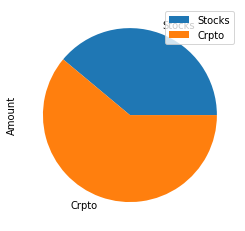

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = 'Amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_agg_value + my_spy_value + my_btc_value + my_eth_value

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! Your total investments are more than 3 times your emergency fund')
elif total_savings == emergency_fund:
    print('Congratulations! You are in the right track, keep saving!')
else:
    print(f'You need to save ${total_savings - emrgency_fund} more to active your active your goal')

Congratulations! Your total investments are more than 3 times your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

stocks_MCSimu30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
stocks_MCSimu30.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
stocks_MCSimu30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999368,1.007975,0.998146,1.010001,1.002273,0.989021,0.983160,0.992224,0.996169,1.001625,...,0.992619,0.987341,1.021200,0.992909,0.999319,1.005903,0.995487,0.991366,1.001661,1.004116
2,0.997150,0.996503,1.000209,1.000950,1.005400,0.987121,0.981188,0.984620,1.006528,0.997747,...,0.993374,0.994399,1.029528,0.997154,1.011011,1.006146,1.000775,0.976112,0.999383,1.002479
3,0.992488,0.986920,0.991500,1.003318,1.006543,0.977868,0.990303,0.997612,1.014696,1.005424,...,0.983761,0.993769,1.029713,1.011649,1.006258,0.991819,0.999919,0.987300,0.991309,0.993749
4,0.984037,0.981098,0.981998,1.008633,1.012721,0.985502,0.992684,1.000412,1.011604,1.011049,...,0.972046,1.000311,1.037595,1.004643,1.008920,1.007069,1.010352,0.994487,1.003583,1.001454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.972976,15.456486,6.353793,43.852228,30.126773,25.654783,70.756507,59.536057,8.388586,9.525306,...,39.081340,10.516197,9.450671,29.184715,37.761843,16.485748,129.023656,14.546653,9.881035,3.068867
7557,15.911266,15.326616,6.350627,44.025141,30.193135,25.729613,70.927777,59.241969,8.346613,9.382823,...,39.221557,10.670282,9.440980,29.180023,37.585035,16.400394,126.216637,14.636875,9.866946,3.089152
7558,15.876515,15.426421,6.374794,44.402742,30.325501,25.803346,71.438845,59.670757,8.359735,9.412281,...,39.075721,10.602207,9.429216,28.647247,37.722141,16.104578,125.311149,14.589689,9.851913,3.058604
7559,15.725083,15.554226,6.388146,43.815705,30.324018,25.987644,70.895406,59.578388,8.381183,9.508467,...,39.611977,10.629969,9.490708,28.209412,37.476051,16.264307,125.389297,14.649584,10.030281,3.066102


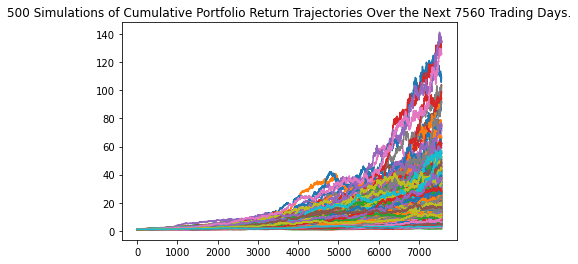

In [19]:
# Plot simulation outcomes
line_plot = stocks_MCSimu30.plot_simulation()

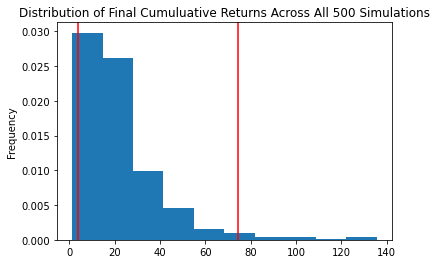

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = stocks_MCSimu30.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = stocks_MCSimu30.summarize_cumulative_return()

# Print summary statistics
print(stocks_tbl)

count           500.000000
mean             22.730821
std              18.852304
min               1.272153
25%              10.635175
50%              17.667718
75%              27.954349
max             135.525869
95% CI Lower      3.987324
95% CI Upper     74.614479
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
stocks_tbl_lower = round(stocks_tbl[8]*initial_investment,2)
stocks_tbl_upper = round(stocks_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stocks_tbl_lower} and ${stocks_tbl_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $79746.47 and $1492289.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
stocks_tbl_lower = round(stocks_tbl[8]*initial_investment,2)
stocks_tbl_upper = round(stocks_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stocks_tbl_lower} and ${stocks_tbl_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $119619.71 and $2238434.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

stocks_MCSimu5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
stocks_MCSimu5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004664,1.006197,0.996764,0.996735,0.999792,0.994078,1.007829,1.007424,1.004980,0.985313,...,0.990544,1.011870,1.000870,1.006005,1.003901,0.997815,0.999850,1.007120,1.001107,1.003402
2,1.012155,1.002620,0.987955,0.999339,1.012471,0.997400,1.011284,1.004541,0.998823,0.982216,...,0.988036,1.019528,1.006734,1.010467,1.017617,0.998567,0.994672,1.008082,0.993372,1.004975
3,1.019226,1.003124,0.981918,1.013313,1.012349,1.004001,1.012491,1.001326,1.004683,0.987889,...,0.970464,1.024536,1.002392,0.995758,1.022965,0.998541,0.981032,1.012627,0.989671,1.010776
4,1.013484,1.004117,0.990038,1.016018,1.001310,0.996692,1.029859,0.993700,0.995514,0.982873,...,0.967471,1.016440,1.004232,0.997198,1.018079,0.990074,0.991240,1.014369,0.988230,1.006685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.923109,1.235130,1.937914,1.557872,1.286440,1.691388,1.124672,1.935974,2.300052,0.994978,...,1.789319,1.367229,1.172462,1.763431,1.259420,1.274054,1.677745,1.479469,1.505456,0.770640
1257,2.949446,1.233640,1.935302,1.564338,1.302084,1.716847,1.119454,1.950941,2.303071,0.988574,...,1.779093,1.372824,1.175577,1.758208,1.271857,1.273483,1.682980,1.469164,1.494018,0.780222
1258,2.938473,1.231318,1.951104,1.574648,1.311606,1.715093,1.124263,1.956530,2.327059,0.999558,...,1.770252,1.367399,1.178539,1.735639,1.270296,1.284200,1.679263,1.467278,1.509075,0.781356
1259,2.955275,1.227351,1.929720,1.578342,1.305005,1.702389,1.126691,1.964310,2.307927,1.004202,...,1.789917,1.347618,1.167571,1.701171,1.288402,1.292852,1.689066,1.461914,1.504949,0.779404


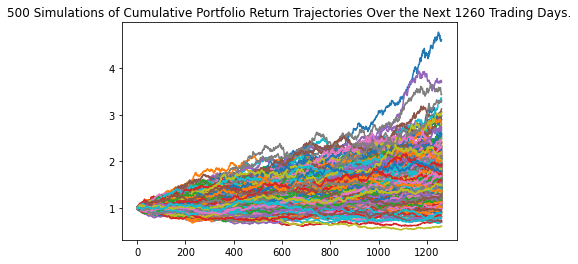

In [26]:
# Plot simulation outcomes
line_plot = stocks_MCSimu5.plot_simulation()

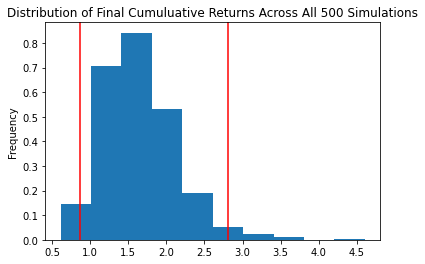

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = stocks_MCSimu5.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = stocks_MCSimu5.summarize_cumulative_return()

# Print summary statistics
print(stocks_tbl)

count           500.000000
mean              1.648806
std               0.494606
min               0.612588
25%               1.307779
50%               1.601977
75%               1.906129
max               4.604760
95% CI Lower      0.868129
95% CI Upper      2.803124
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
stocks_tbl_lower = round(stocks_tbl[8]*initial_investment,2)
stocks_tbl_upper = round(stocks_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${stocks_tbl_lower} and ${stocks_tbl_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52087.73 and $168187.43


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

stocks_MCSimu10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
stocks_MCSimu10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001182,1.004096,1.006111,1.006307,1.001481,1.002671,0.994722,1.002478,1.004167,1.000358,...,0.996247,0.990965,1.012290,0.987531,1.014516,1.002769,1.001487,0.987220,0.992619,0.997718
2,0.998212,1.015667,0.995953,1.006411,1.007616,1.010322,0.995474,1.000751,1.002407,1.000799,...,0.990368,1.005627,1.027383,0.985644,1.017635,1.008842,0.997349,0.989518,1.011296,0.993697
3,1.000351,1.008031,0.996820,1.004529,1.010881,1.003261,1.004989,0.992820,0.997128,0.991662,...,0.996392,1.003878,1.041917,0.986030,1.006742,1.028328,1.013024,1.000524,1.009956,0.991983
4,0.995905,1.014557,0.993847,1.005171,1.007020,1.003033,1.001983,0.992151,0.990589,0.978331,...,0.986200,1.000451,1.051900,0.995100,1.006264,1.024504,1.004209,0.999374,1.017985,0.998993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.720181,2.622641,4.094453,5.422246,2.607464,3.416104,1.970844,2.013687,1.659956,1.421527,...,3.004133,3.290838,3.541941,1.001206,4.414481,3.838531,5.400458,1.935291,2.761539,2.719339
2517,2.723676,2.634515,4.034028,5.402854,2.608922,3.379180,1.981509,2.002921,1.658623,1.434102,...,2.983690,3.316204,3.545457,1.007453,4.428448,3.806654,5.379283,1.952763,2.740460,2.758272
2518,2.736122,2.611699,4.035882,5.261269,2.589873,3.423597,1.999826,2.022849,1.663553,1.411551,...,2.989612,3.246712,3.575112,1.001726,4.375856,3.795757,5.426134,1.930607,2.746306,2.736689
2519,2.739582,2.638436,4.100519,5.343193,2.600727,3.387463,2.010984,2.033971,1.668055,1.402602,...,3.016751,3.250301,3.552784,0.993032,4.374765,3.819191,5.431262,1.944713,2.736033,2.756019


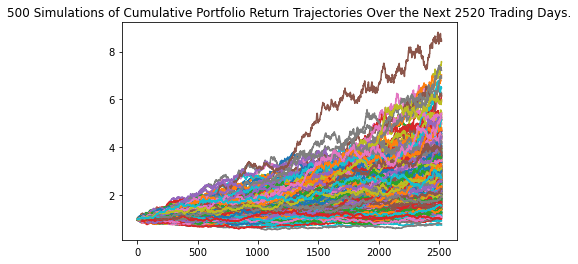

In [32]:
# Plot simulation outcomes
line_plot = stocks_MCSimu10.plot_simulation()

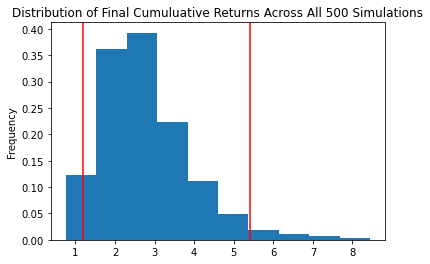

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = stocks_MCSimu10.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = stocks_MCSimu10.summarize_cumulative_return()
# Print summary statistics
print(stocks_tbl)

count           500.000000
mean              2.786097
std               1.144369
min               0.755975
25%               1.987992
50%               2.587960
75%               3.393558
max               8.446413
95% CI Lower      1.187047
95% CI Upper      5.409645
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
stocks_tbl_lower = round(stocks_tbl[8]*initial_investment,2)
stocks_tbl_upper = round(stocks_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${stocks_tbl_lower} and ${stocks_tbl_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71222.81 and $324578.72
